In [51]:
from world import World 
import matplotlib.pyplot as plt
import numpy as np
import scipy
import itertools as it

## Chaotic Agent

In [36]:
world = World(agent=["chaos","dummy"], seed=7,  time=500, state_size=20)
world.create_agents()
world.run()
agents = world.get_agents()
costs = world.get_costs()
preds = world.get_pred()
priors = world.get_behav_priors()
time = [t for t in range(len(costs[0]))]

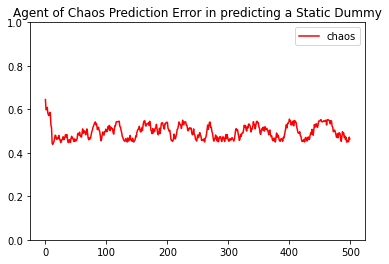

In [37]:
plt.plot(time, costs[0], 'r',label=agents[0])
#plt.plot(time, costs[1], 'g', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Agent of Chaos Prediction Error in predicting a Static Dummy")
plt.show()

In [38]:
world = World(agent=["chaos","chaos"], seed=7, time=500, state_size=20)
world.create_agents()
world.run()
agents = world.get_agents()
costs = world.get_costs()
preds = world.get_pred()
priors = world.get_behav_priors()
time = [t for t in range(len(costs[0]))]

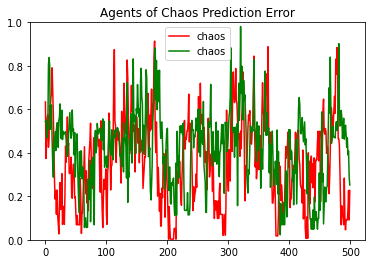

In [39]:
plt.plot(time, costs[0], 'r', label=agents[0])
plt.plot(time, costs[1], 'g', label=agents[1])
plt.ylim([0, 1])
plt.legend()
plt.title("Agents of Chaos Prediction Error")
plt.show()

## Dynamic Agent

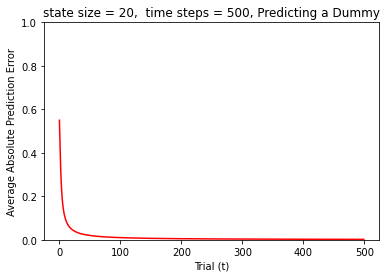

In [47]:
n = 20
t = 500
world = World(state_size = n, time = t, agent=["model_alt", "dummy"], 
              memory=[0,0], behav_control=[0,0], model_var=[1,1], 
              behav_initial_spread = [1,1], pred_initial_spread = [1,1],
               seed=7
             )
world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
#world.print_results()
time = [t for t in range(len(costs[0]))]

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'red', label=agents[0])
#plt.plot(time, costs[1], 'green', label=agents[1])
plt.ylim([0, 1])
plt.xlabel('Trial (t)')
plt.ylabel('Average Absolute Prediction Error')
# plt.xlim([500,1000])
# plt.legend()
plt.title("state size = "+str(n)+", "+" time steps = "+str(t) + ", Predicting a Dummy")
plt.show()

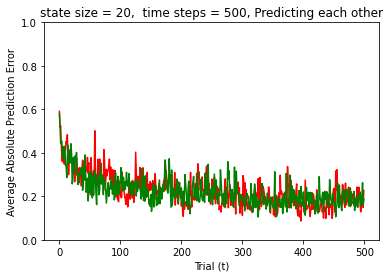

In [46]:
n = 20
t = 500
world = World(state_size = n, time = t, agent=["model_alt", "model_alt"], 
              memory=[0,0], behav_control=[0,0], model_var=[1,1], 
              behav_initial_spread = [1,1], pred_initial_spread = [1,1],
               seed=7
             )
world.create_agents()
world.run()
agents = world.get_agents()
errors = world.get_errors()
preds = world.get_pred()
priors = world.get_behav_priors()
costs = world.get_costs()
#world.print_results()
time = [t for t in range(len(costs[0]))]

plt.figure(facecolor='white') 
plt.plot(time, costs[0], 'red', label=agents[0])
plt.plot(time, costs[1], 'green', label=agents[1])
plt.ylim([0, 1])
plt.xlabel('Trial (t)')
plt.ylabel('Average Absolute Prediction Error')
# plt.xlim([500,1000])
# plt.legend()
plt.title("state size = "+str(n)+", "+" time steps = "+str(t) + ", Predicting each other")
plt.show()

## Estimating Parameters of a Binomial Distribution

most recent behaviors: [0]
alpha, beta: 2 3
mode: 0.3333333333333333
most recent behaviors: [0, 1]
alpha, beta: 3 3
mode: 0.5
most recent behaviors: [0, 1, 0]
alpha, beta: 3 4
mode: 0.4
most recent behaviors: [0, 1, 0, 0]
alpha, beta: 3 5
mode: 0.3333333333333333
most recent behaviors: [0, 1, 0, 0, 0]
alpha, beta: 3 6
mode: 0.2857142857142857
most recent behaviors: [0, 1, 0, 0, 0, 0]
alpha, beta: 3 7
mode: 0.25
most recent behaviors: [0, 1, 0, 0, 0, 0, 0]
alpha, beta: 3 8
mode: 0.2222222222222222
most recent behaviors: [0, 1, 0, 0, 0, 0, 0, 0]
alpha, beta: 3 9
mode: 0.2


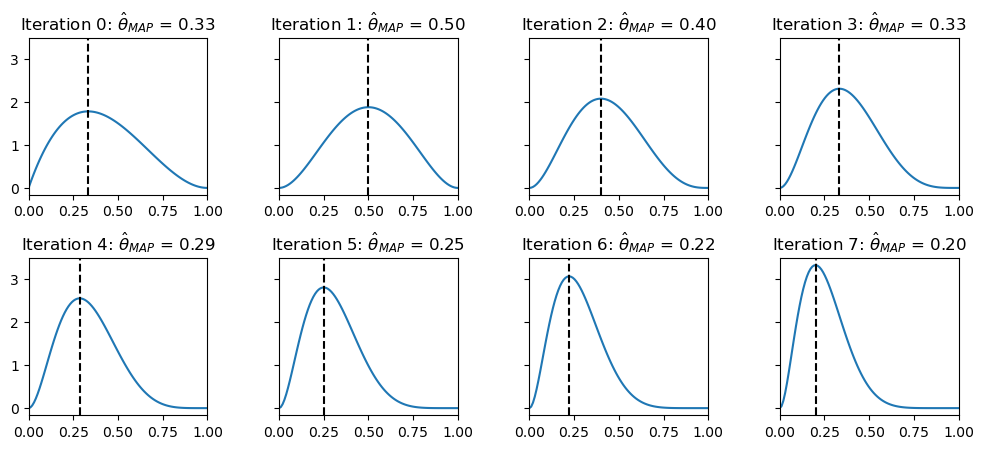

In [77]:
w = 3; h = 2.5
ncols = 4
nrows = 2
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

priors = np.linspace(0, 1, 100)
a = b = 2
prior = 0.2
trials = 8
behaviors = []

for t in range(trials):
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    print("most recent behaviors:", behaviors)
    a = a+behavior[0]
    b = b-behavior[0]+1
    print("alpha, beta:", a, b)
    dist = scipy.stats.beta.pdf(x=priors, a=a, b=b)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    print("mode:", mode)
    
    ai = tups[t]

    # plots
    ax[ai].plot(priors, dist)
    ax[ai].set_xlim(0,1)
    ax[ai].axvline(x=mode, linestyle='--', color='k')
    ax[ai].set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(t, mode))

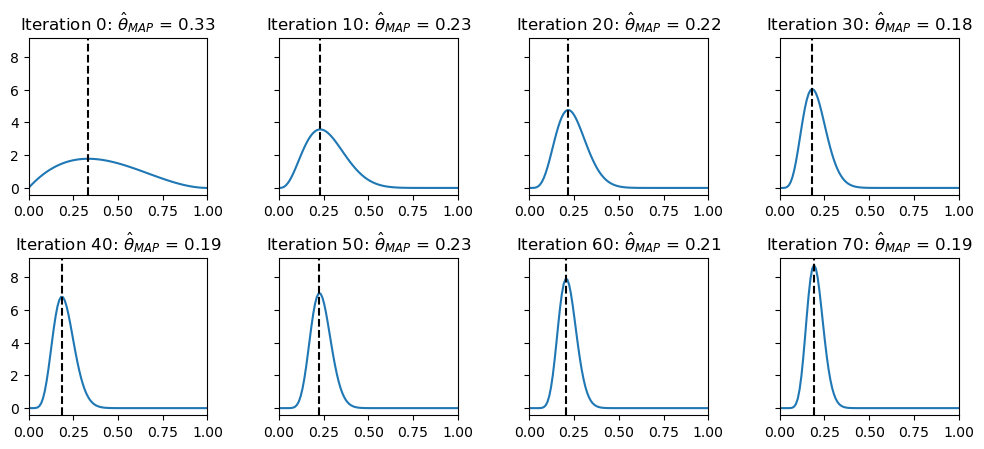

In [82]:
w = 3; h = 2.5
ncols = 4
nrows = 2
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

priors = np.linspace(0, 1, 100)
a = b = 2
prior = 0.2
trials = 80
behaviors = []

for t in range(trials):
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    #print("most recent behaviors:", behaviors)
    a = a+behavior[0]
    b = b-behavior[0]+1
    #print("alpha, beta:", a, b)
    dist = scipy.stats.beta.pdf(x=priors, a=a, b=b)
    if a > 1 and b > 1:
        estimate = (a-1)/(a+b-2)
    else:
        estimate = a/(a+b)
    #print("mode:", mode)
    if t % 10 == 0:
        ai = tups[int(t/10)]

        # plots
        ax[ai].plot(priors, dist)
        ax[ai].set_xlim(0,1)
        ax[ai].axvline(x=estimate, linestyle='--', color='k')
        ax[ai].set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(t, estimate))

10 most recent behaviors: [0]
alpha, beta: 2 3
estimate: 0.3333333333333333
10 most recent behaviors: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
alpha, beta: 2 6
estimate: 0.16666666666666666
10 most recent behaviors: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
alpha, beta: 2 17
estimate: 0.058823529411764705
10 most recent behaviors: [0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
alpha, beta: 9 32
estimate: 0.20512820512820512
10 most recent behaviors: [1, 1, 0, 0, 0, 0, 0, 0, 0, 1]
alpha, beta: 9 32
estimate: 0.20512820512820512
10 most recent behaviors: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
alpha, beta: 9 32
estimate: 0.20512820512820512
10 most recent behaviors: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
alpha, beta: 9 32
estimate: 0.20512820512820512
10 most recent behaviors: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
alpha, beta: 9 32
estimate: 0.20512820512820512


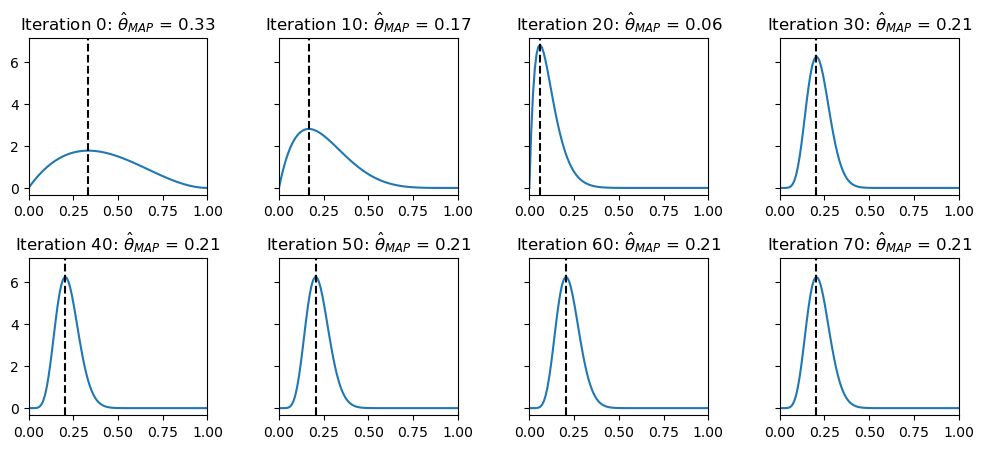

In [86]:
w = 3; h = 2.5
ncols = 4
nrows = 2
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

priors = np.linspace(0, 1, 100)
a = b = 2
prior = 0.2
trials = 80
behaviors = []
THRESHOLD = 0.05
MEMORY = 10

for t in range(trials):
    behavior = np.random.binomial(1, prior, 1)
    behaviors.append(behavior[0])
    behaviors = behaviors[(-1*MEMORY):]
    if t > 0:
        new_a = a+sum(behaviors)
        new_b = b+(len(behaviors)+1-sum(behaviors))
        
        if new_a > 1 and new_b > 1:
            new_estimate = (new_a-1)/(new_a+new_b-2)
        else:
            new_estimate = new_a/(new_a+new_b)
            
        if abs(estimate - new_estimate) > 0.05:
            estimate = new_estimate
            a = (new_a)
            b = (new_b)
    else:
        a = a+behavior[0]
        b = b-behavior[0]+1
        
    dist = scipy.stats.beta.pdf(x=priors, a=a, b=b)
    if a > 1 and b > 1:
        estimate = (a-1)/(a+b-2)
    else:
        estimate = a/(a+b)
        
    if t % 10 == 0:
        print("10 most recent behaviors:", behaviors)
        print("alpha, beta:", a, b)
        print("estimate:", estimate)
        ai = tups[int(t/10)]

        # plots
        ax[ai].plot(priors, dist)
        ax[ai].set_xlim(0,1)
        ax[ai].axvline(x=estimate, linestyle='--', color='k')
        ax[ai].set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(t, estimate))

## Action Items (order of priority)

- MAP predictions of others (without growing alpha, beta)
- Attention mechanism
- Literature Review for background
- Updated conformity mechanism
- Cyclical behavioral transitions
    - sequential NN to predict future behavior
- Action Cost Curve
- Multi-agent experiments

